# Lập và giải công thức đệ quy xác định độ phức tạp thuật toán (2.4)
1. Solve the following recurrence relations.
    1. $x(n) = 2x(n − 3)\;for\; n > 1, x(1) = 1$
$$
\begin{array}{ll}
    x(n) = 2(2x(n-3))\\
    ...\\
    \Rightarrow x(n) = 2^kx(n-3k)\qquad k = \lfloor \frac{n}{3} \rfloor\\
    \Rightarrow x(n) = 2^k\\
    \Rightarrow x(n) = O(2^{\frac{n}{3} + 1}) = O(2^n)
\end{array}
$$
        Nếu $n\mod 3 \neq 1$ không suy biến
    2. $x(n) = x(n − 2) − 2\; for\; n > 1, x(1) = 0$
$$
\begin{array}{ll}
    x(n) = x(n-2)-2\\
    \Rightarrow x(n) = (x(n-4)-2)-2\\
    ...\\
    \Rightarrow x(n) = x(n-2k)-2*k \qquad k = \lfloor \frac{n}{2} \rfloor\\
    \Rightarrow x(n) = -2k\\
    \Rightarrow x(n) = O(2\frac{n}{2}) = O(n)
\end{array}   
$$
        Nếu $n\mod 2 \neq 1$ không suy biến
    3. $x(n) = 2x(n − 2) − n\; for\; n > 0, x(0) = 0$
$$
\begin{array}{ll}
    x(n) = 2x(n-2)-n\\
    \Rightarrow x(n) = 2(2x(n-4)-n)-n\\
    ...\\
    \Rightarrow x(n) = 2^kx(n-2k)-kn \qquad k = \lfloor \frac{n}{2} \rfloor\\
    \Rightarrow x(n) = 2^k-kn\\
    \Rightarrow x(n) = O(2^{\frac{n}{2}+1}- \frac{n}{2}*n) \approx O(2^n)
\end{array}
$$
        Nếu $n\mod 2 \neq 0$ không suy biến
    4. $x(n) = x(n/2) − 2 \;for\; n > 1, x(1) = 2 (solve\; for\; n = 4^k)$
$$
\begin{array}{ll}
    a = 1, b = 2, d = 0\\
    a = b ^ d (1=2^0)\\
    \Rightarrow x(n) = O(log n)
\end{array}
$$
    5. $x(n) = x(n/5) + n \;for\; n > 1, x(1) = 1 (solve\; for\; n = 5^k)$
$$
\begin{array}{ll}
    a = 1, b = 5, d = 1\\
    a < b ^ d (1<5^1)\\
    \Rightarrow x(n) = O(n)
\end{array}
$$

2. Set up and solve a recurrence relation for the number of calls made by F (n), the recursive algorithm for computing the binary equivalent of the decimal number n.
$$T(n)=
\left\{
  \begin{array}{ll}
    1&if\;(n = 0) \\
    T(\frac{n}{2})+1&if\;(n > 0)
  \end{array}
\right.
$$
$$
\Rightarrow T(n)=O(log n)
$$

# Lập trình đệ quy

In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np


def runtime_graph(f, n=1000):
    times = []
    for i in range(n+1):
        start = time.time()
        f(i)
        end = time.time()
        times.append(end - start)

    total = np.array(times).sum()
    plt.plot(np.arange(n+1), times, color='red', label="realtime: {time: .4f} s".format(time=total))
    plt.xlim(0, n)
    plt.xticks(np.arange(0,n+1,n//10))
    plt.ylim(bottom=0)
    plt.legend()
    plt.figure(figsize=(1920,1080))
    plt.show()

## In biểu diễn nhị phân số nguyên

In [2]:
def dec2bin(n):
    if n == 0:
        return 0
    else:
        return n % 2 + 10 * dec2bin(n // 2)


dec2bin(123456)

11110001001000000

$$T(n)=
\left\{
  \begin{array}{ll}
    1&if\;(n = 0) \\
    T(\frac{n}{2})+1&if\;(n > 0)
  \end{array}
\right.
$$
$$
\Rightarrow T(n)=O(log(n))
$$

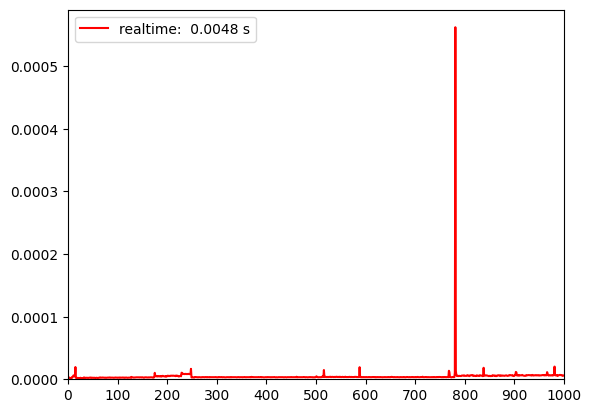

<Figure size 192000x108000 with 0 Axes>

In [12]:
runtime_graph(dec2bin)

/tmp/ipykernel_24866/1167002652.py:1: RuntimeWarning: divide by zero encountered in log2
  f = lambda n: np.log2(n)


(0.0, 10.464073498895191)

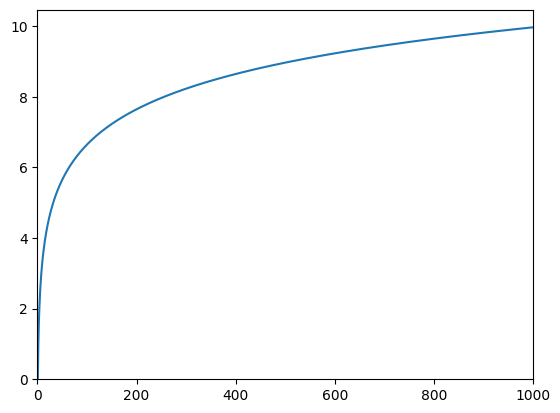

In [4]:
f = lambda n: np.log2(n)
n = np.arange(1001)
plt.plot(n, f(n))
plt.xlim(0,1000)
plt.ylim(bottom=0)

## Phân tích số nguyên thành tích các thừa số nguyên tố.

In [10]:
def prime_factorization(n, i=2):
    if n <= 1:
        return []
    elif n % i == 0:
        return [i] + prime_factorization(n // i, i)
    else:
        return prime_factorization(n, i + 1)


prime_factorization(123456)

[2, 2, 2, 2, 2, 2, 3, 643]

$$T(n)=
\left\{
  \begin{array}{ll}
    &if\;(n \leq 1) \\
    T(\frac{n}{i},i)&if\;(n \neq 0,1) \& (n\%i=0) \\
    T(n,i+1)&if\;(n \neq 0,1) \& (n\%i\neq0)
  \end{array}
  \right.
$$

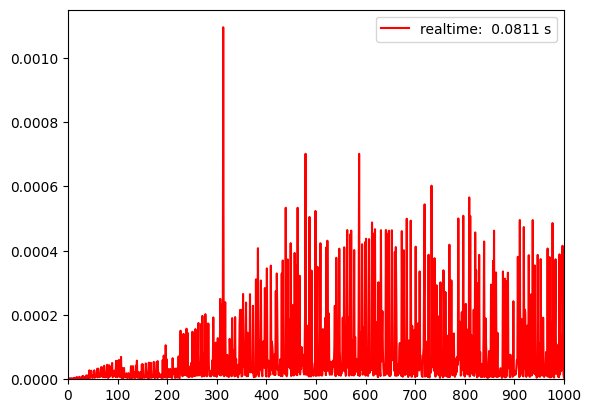

<Figure size 192000x108000 with 0 Axes>

In [5]:
runtime_graph(prime_factorization)

## Tìm số Fibonacci thứ n.

In [7]:
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)


fibonacci(10)

55

$$T(n)=
\left\{
  \begin{array}{ll}
    1&if\;(n = 0) \\
    T(n-1)+T(n-2)&if\;(n > 0)
  \end{array}
  \right.
$$
$$
\Rightarrow T(n)\approx O(2^n)
$$

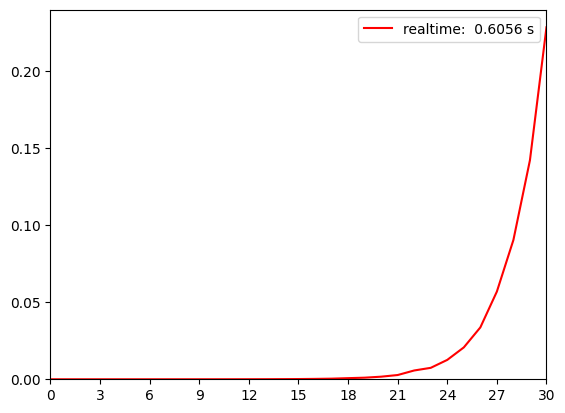

<Figure size 192000x108000 with 0 Axes>

In [8]:
runtime_graph(fibonacci, 30)

(0.0, 1127428915.15)

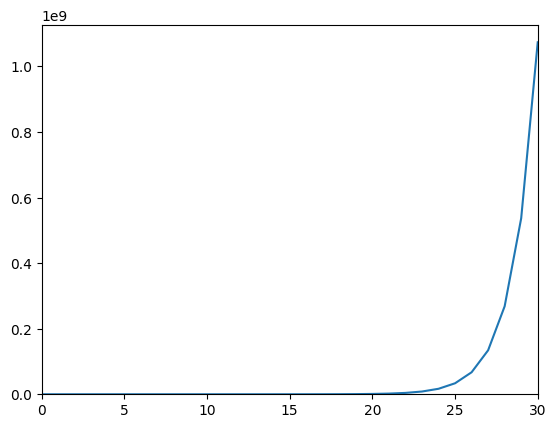

In [9]:
f = lambda n: 2 ** n
n = np.arange(31)
plt.plot(n, f(n))
plt.xlim(0,30)
plt.ylim(bottom=0)

## Bài toán tháp Hà Nội.

In [10]:
def hanoi_tower(n, from_rod='A', to_rod='B', aux_rod='C'):
    if n == 0:
        return
    hanoi_tower(n - 1, from_rod, aux_rod, to_rod)
    hanoi_tower(n - 1, aux_rod, to_rod, from_rod)

$$T(n)=
\left\{
  \begin{array}{ll}
    &if\;(n = 0) \\
    2T(n-1)+1&if\;(n \neq 0)
  \end{array}
  \right.
\\
\Rightarrow T(n)=O(2^n)
$$

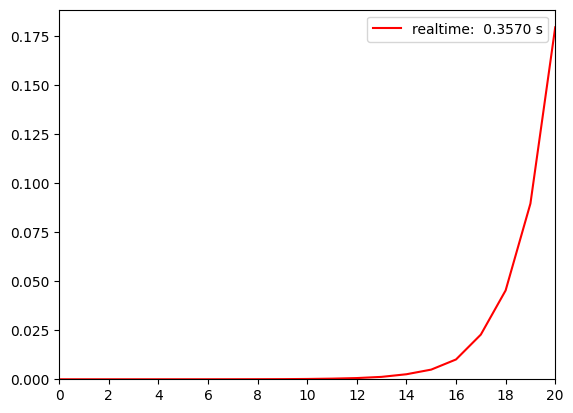

<Figure size 192000x108000 with 0 Axes>

In [11]:
runtime_graph(hanoi_tower, 20)

(0.0, 1101004.75)

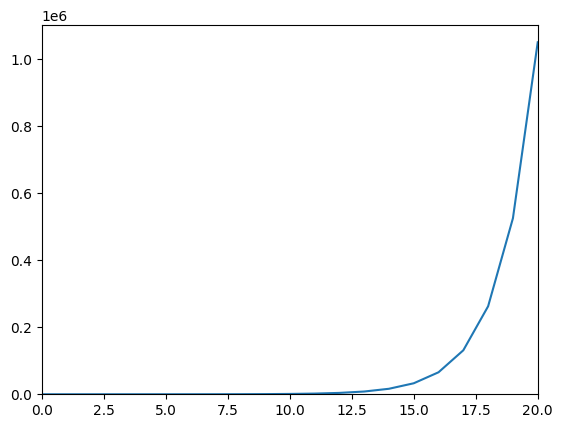

In [12]:
f = lambda n: 2 ** n
n = np.arange(21)
plt.plot(n, f(n))
plt.xlim(0,20)
plt.ylim(bottom=0)

# Đặt bài toán, thiết kế, phân tích và triển khai thuật toán
Tự đặt ít nhất một đề bài toán, phân tích bài toán, xây dựng thuật toán, chứng minh tính đúng, đánh giá độ phức tạp của thuật toán và viết chương trình để minh họa kỹ thuật đệ quy.

## Bài toán chia thưởng
Có m phần thưởng được thưởng cho n học sinh giỏi có xếp hạng theo thứ tự từ 1 đến n. Hỏi có bao nhiêu cách chia các phần thưởng thoả mãn các điều kiện sau:
    - Học sinh giỏi hơn có số phần thưởng không ít hơn bạn kém hơn
    - m phần thưởng phải chia hết cho các học sinh.

Giải:
- Để đảm bảo 2 điều kiện ta sẽ triển khai với dạng bài toán chia kẹo Euler với công thức $$x_1+x_2+...x_n = m \qquad (x_1 \geq x_2 \geq. ..\geq x_n \geq 0)$$
Số cách chia này là ${m+n-1}\choose{n-1}$.
- Xây dựng thuật toán $f(n,m)$ và chứng minh tính đúng đắn
    - Trường hợp $n \leq 0$, không có cách chia nào hợp lệ.
    - Trường hợp $m < 0$, không có cách chia nào hợp lệ.
    - Trường hợp $m = 0$, có 1 cách chia là không ai có gì.
    - Trường hợp $m = 1$, có 1 cách chia là người cao nhất được.
    - Trường hợp $m > 0$, giả sử thuật toán hoạt động đúng với $n-1$, trong trường hợp $x_n = 0$ ta sẽ có $f(n,m) = f(n-1,m)$, trong trường hợp $x_n > 0$ ta sẽ có $f(n,m) = f(n,m-n)$.
$\Rightarrow$ Do đó $f(n,m) = f(n-1,m) + f(n,m-n)$
- Ta có
$$F(m,n)=
\left\{
    \begin{array}{ll}
        0&if\;(n \leq 0) \\
        0&if\;(m < 0) \\
        1&if\;(m = 0 || m = 1) \\
        F(m,n-1)+F(m-n,n)&if\;(m > 0)
    \end{array}
\right.
$$
$$
\begin{array}{ll}
    F(m,n) = F(m,n-1) + F(m-n,n) \leq 2F(m,n-1)\\
    \Rightarrow F(m,n) \leq 2(2F(m,n-2)) \\
    \Rightarrow F(m,n) \leq 2^nF(m,1) \\
    \Rightarrow F(m,n) \leq 2^nF(m-1,1) \\
    \Rightarrow F(m,n) \leq 2^{nm}F(1,1)\\
    \Rightarrow F(m,n) \approx O(2^{mn})
\end{array}
$$
- Triển khai thuật toán

In [13]:
class Test:
    count = 0
    def count_way(self,student,gift):
        self.count= self.count+1
        if student <= 0:
            return 0
        if gift < 0:
            return 0
        elif gift == 0:
            return 1
        elif gift == 1:
            return 1
        else:
            return self.count_way(student-1,gift) + self.count_way(student,gift-student)


tmp = Test()
tmp.count_way(10,10), tmp.count

(42, 247)